<a href="https://colab.research.google.com/github/miggelucas/Python-studies/blob/master/NLP_Project_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Natural Language Processing Project

Welcome to the NLP Project for this section of the course. In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! Just follow the directions below!

## Imports
 **Import the usual suspects. :) **

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [ ]:
data = pd.read_json('/content/yelp_training_set_review.json', lines= True)

In [ ]:
data = pd.read_json('/content/yelp_training_set_review.json', lines= True)
a = time.time()
for vote in ['funny', 'useful', 'cool']:
  data[vote] = [x[1][0][vote] for x in data.iterrows()]

data.drop(columns= 'votes', inplace= True)
b = time.time()
print("essa operação levou: ", b-a)

essa operação levou:  53.53215956687927


In [ ]:
data = pd.read_json('/content/yelp_training_set_review.json', lines= True)
a = time.time()
for vote in  ['funny', 'useful', 'cool']:
  data[vote] = [data['votes'][x][vote] for x in range(len(data))]

data.drop(columns= 'votes', inplace= True)
b = time.time()
print("essa operação levou: ", b-a)

essa operação levou:  5.0386388301849365


** Check the head, info , and describe methods on yelp.**

In [ ]:
data

,user_id,review_id,stars,date,text,type,business_id,useful,cool,funny
0,rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg,5,2,0
1,0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow,0,0,0
2,0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA,1,0,0
3,uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg,2,1,0
4,vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
229902,6e7pZofhDuIlD_rX2oYirQ,f9JaiNg_FMoPNWxt7MlbZQ,2,2011-04-14,I really wanted to like this place because it'...,review,vnffHkFJbmd-J3OaBbK2Eg,0,0,0
229903,dDNfSFT0VApxPmURclX6_g,QDWRP1pW5r0huIBAoGmFyg,1,2011-01-23,My husband I stayed here for two nights. Of c...,review,l5oUrgQ190l8CcN8uzd_pA,2,0,0
229904,M5wHt6Odh1k5v0tIjqd8DQ,JmR3yk7JlS1LVVxtIc3xBQ,4,2010-10-11,Cool atmosphere. A lot of beers on tap and goo...,review,-EctXOb3B7T177jGYUhjVA,0,0,0
229905,jopndPrv-H5KW2CfScnw9A,z5b2p5TbCg0uaIiIe8n62w,3,2011-01-18,I have to take a star off for the spotty servi...,review,YQvg0JCGRFUkb6reMMf3Iw,2,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229907 entries, 0 to 229906
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   user_id      229907 non-null  object        
 1   review_id    229907 non-null  object        
 2   stars        229907 non-null  int64         
 3   date         229907 non-null  datetime64[ns]
 4   text         229907 non-null  object        
 5   type         229907 non-null  object        
 6   business_id  229907 non-null  object        
 7   useful       229907 non-null  int64         
 8   cool         229907 non-null  int64         
 9   funny        229907 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 17.5+ MB


In [ ]:
data.describe()

,stars,useful,cool,funny
count,229907.000000,229907.000000,229907.000000,229907.000000
mean,3.766723,1.386822,0.868234,0.699030
std,1.217010,2.229284,1.943242,1.863522
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,0.000000,0.000000
75%,5.000000,2.000000,1.000000,1.000000
max,5.000000,120.000000,117.000000,70.000000


**Create a new column called "text length" which is the number of words in the text column.**

In [ ]:
data['lenght'] = [len(x) for x in data['text']]
data.head()

,user_id,review_id,stars,date,text,type,business_id,funny,useful,cool,lenght
0,rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg,0,5,2,889
1,0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow,0,0,0,1345
2,0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA,0,1,0,76
3,uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg,0,2,1,419
4,vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw,0,0,0,469


# EDA

Let's explore the data

## Imports

**Import the data visualization libraries if you haven't done so already.**

**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

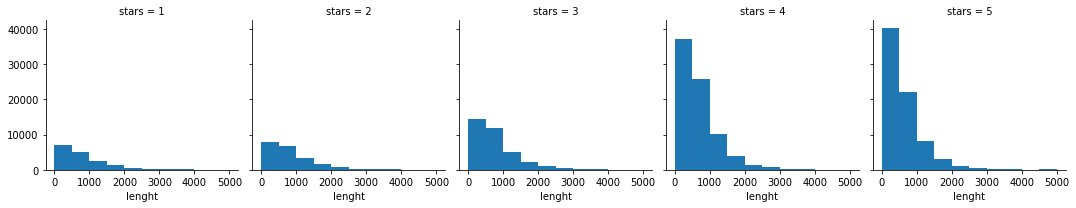

In [ ]:
g = sns.FacetGrid(data,col='stars')
g.map(plt.hist,'lenght')

**Create a boxplot of text length for each star category.**

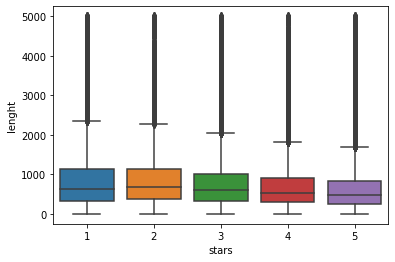

In [ ]:
sns.boxplot(data= data, x= 'stars', y= 'lenght')

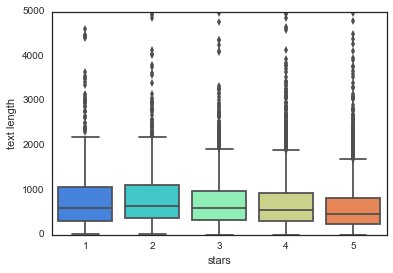

**Create a countplot of the number of occurrences for each type of star rating.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


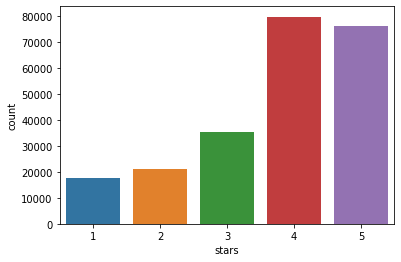

In [ ]:
sns.countplot(data['stars'])

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [ ]:
data.groupby('stars').describe()

funny                                ... lenght                              
         count      mean       std  min  25%  ...    min    25%    50%     75%     max
stars                                         ...                                     
1      17516.0  0.930007  2.194980  0.0  0.0  ...    3.0  322.0  627.0  1130.0  5000.0
2      20957.0  0.892828  2.060167  0.0  0.0  ...    4.0  368.0  669.0  1134.0  5000.0
3      35363.0  0.765320  1.935074  0.0  0.0  ...    0.0  334.0  605.0  1015.0  5000.0
4      79878.0  0.677158  1.838833  0.0  0.0  ...    0.0  293.0  536.0   904.0  5000.0
5      76193.0  0.584791  1.697920  0.0  0.0  ...    0.0  244.0  468.0   820.0  5000.0

[5 rows x 32 columns]

**Use the corr() method on that groupby dataframe to produce this dataframe:**

In [ ]:
data.groupby('stars').mean().corr()

,funny,useful,cool,lenght
funny,1.000000,0.940279,-0.860878,0.983783
useful,0.940279,1.000000,-0.860840,0.901948
cool,-0.860878,-0.860840,1.000000,-0.788046
lenght,0.983783,0.901948,-0.788046,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

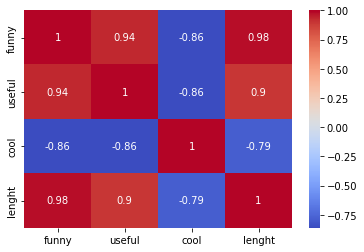

In [ ]:
sns.heatmap(data.groupby('stars').mean().corr(), cmap='coolwarm',annot=True)

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [ ]:
data_class = data[(data.stars==1) | (data.stars==5)]

** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [ ]:
X = data_class['text']
y = data_class['stars']

**Import CountVectorizer and create a CountVectorizer object.**

In [ ]:
cv = CountVectorizer()

** Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [ ]:
X = cv.fit_transform(X)

## Train Test Split

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Training a Model

Time to train a model!

** Import MultinomialNB and create an instance of the estimator and call is nb **

In [ ]:
from sklearn.naive_bayes import MultinomialNB

**Now fit nb using the training data.**

In [ ]:
modelo = MultinomialNB().fit(X_train, y_train)

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [ ]:
predict = modelo.predict(X_test)

** Create a confusion matrix and classification report using these predictions and y_test **

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test, predict))

[[ 3702   654]
 [ 1027 18045]]


In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           1       0.78      0.85      0.81      4356
           5       0.97      0.95      0.96     19072

    accuracy                           0.93     23428
   macro avg       0.87      0.90      0.89     23428
weighted avg       0.93      0.93      0.93     23428



**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [ ]:
from sklearn.feature_extraction.text import  TfidfTransformer

** Import Pipeline from sklearn. **

In [ ]:
from sklearn.pipeline import Pipeline

** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [ ]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [ ]:
from nltk.corpus import stopwords
def text_process(mess):
  # 1. remove punctuation
  # 2. remove stop words
  # 3. return list of clean text words

  nopunc = [char for char in mess if char not in string.punctuation]
  
  nopunc = ''.join(nopunc)

  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
data_class

,user_id,review_id,stars,date,text,type,business_id,funny,useful,cool,lenght
0,rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg,0,5,2,889
1,0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow,0,0,0,1345
3,uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg,0,2,1,419
4,vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw,0,0,0,469
6,wFweIWhv2fREZV_dYkz_1g,riFQ3vxNpP4rWLk_CSri2A,5,2010-02-12,Drop what you're doing and drive here. After I...,review,zp713qNhx8d9KCJJnrw1xA,4,7,7,1565
...,...,...,...,...,...,...,...,...,...,...,...
229894,t7FjQwcAY2wYJMgmfVrvKQ,TpZdxtW9C4vUCONsRcWXNQ,5,2009-07-20,I have passed by Yen Sushi & Sake Bar several ...,review,Tt6DYs0TyERWHWW5xiRL_A,0,1,0,2033
229899,Ak2jlINPRk9dWWazWUW2hA,Cmkb7SDJWYtWZXgAfOwJkQ,5,2008-12-05,Los Olivos is great! I am a huge fan of any c...,review,Li5LOL873Ep8HoPRML18sw,0,1,1,260
229900,CAlxnkAuqNetlUmWtCQ_eQ,A1Y7yT_kgj391Xa1jcKzmw,1,2008-02-03,The coffee was good.\nI had the two egg breakf...,review,Y-9dJvw-J2d9QKfuL7mKgA,0,2,0,758
229903,dDNfSFT0VApxPmURclX6_g,QDWRP1pW5r0huIBAoGmFyg,1,2011-01-23,My husband I stayed here for two nights. Of c...,review,l5oUrgQ190l8CcN8uzd_pA,0,2,0,831


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['stars'])

In [ ]:
bow_transformer = CountVectorizer(analyzer= text_process).fit(X_train)

In [ ]:
messages_bow = bow_transformer.transform(X_train)
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [ ]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
modelo = MultinomialNB().fit(messages_tfidf, y_train)

In [ ]:
bow_transformer = CountVectorizer(analyzer= text_process).fit(X_test)
messages_bow = bow_transformer.transform(X_test)

In [ ]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [ ]:
predict = modelo.predict(messages_tfidf)

In [ ]:
print(confusion_matrix(y_test, predict))

In [ ]:
print(classification_report(y_test, predict))


**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [ ]:
# May take some time
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

X_train, X_test, y_train, y_test = train_test_split(data_class['text'], data_class['stars'])

In [ ]:
y_train.unique()

array([5, 1])

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f2086425950>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
predictions = pipeline.predict(X_test)

In [ ]:
predictions

array([4, 4, 4, ..., 5, 4, 4])

In [ ]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  133     3    12  3296   947]
 [   13     2    36  4806   457]
 [    3     2    25  8266   625]
 [    0     0     1 16380  3499]
 [    0     0     0  9307  9664]]
              precision    recall  f1-score   support

           1       0.89      0.03      0.06      4391
           2       0.29      0.00      0.00      5314
           3       0.34      0.00      0.01      8921
           4       0.39      0.82      0.53     19880
           5       0.64      0.51      0.57     18971

    accuracy                           0.46     57477
   macro avg       0.51      0.27      0.23     57477
weighted avg       0.49      0.46      0.38     57477



### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



/Users/marci/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Looks like Tf-Idf actually made things worse! That is it for this project. But there is still a lot more you can play with:

**Some other things to try....**
Try going back and playing around with the pipeline steps and seeing if creating a custom analyzer like we did in the lecture helps (note: it probably won't). Or recreate the pipeline with just the CountVectorizer() and NaiveBayes. Does changing the ML model at the end to another classifier help at all?

# Great Job!